<a href="https://colab.research.google.com/github/maxashoka3/transfer-learning-projects/blob/main/Skin_cancer_Detection/Notebook/Skin_cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

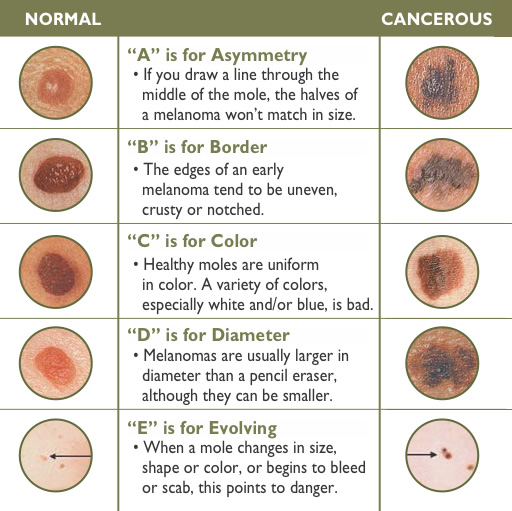

What Is Skin Cancer?

Skin cancer is the out-of-control growth of abnormal cells in the epidermis, the outermost skin layer, caused by unrepaired DNA damage that triggers mutations. These mutations lead the skin cells to multiply rapidly and form malignant tumors. The main types of skin cancer are basal cell carcinoma (BCC), squamous cell carcinoma (SCC), melanoma and Merkel cell carcinoma (MCC).

What Does Skin Cancer Look Like?

Skin cancers can look quite different from one person to another due to skin tone, size and type of skin cancer and location on the body. See our Skin Cancer Pictures page for a selection of photos to help you understand what skin cancers can look like. View pictures.

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maxashoka","key":"b9a7e6074cdb8aea0f369fde55c833b5"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000



In [7]:

!unzip -q skin-cancer-mnist-ham10000.zip -d ham10000_data

In [8]:
df = pd.read_csv('/content/ham10000_data/HAM10000_metadata.csv')

In [9]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [11]:
df.isnull().sum()

,0
lesion_id,0
image_id,0
dx,0
dx_type,0
age,57
sex,0
localization,0


In [12]:
df.shape

(10015, 7)

There are total rows of 10015 rows with the null value of 57 in the "age" column.

In [13]:
df1 = df.copy()

In [15]:
# droping the null values
df1.dropna(inplace = True)

In [16]:
# age is of the float type so change to the int type
df1['age']= df1['age'].astype(int)

In [17]:
# lets take look at the localization column
df1['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

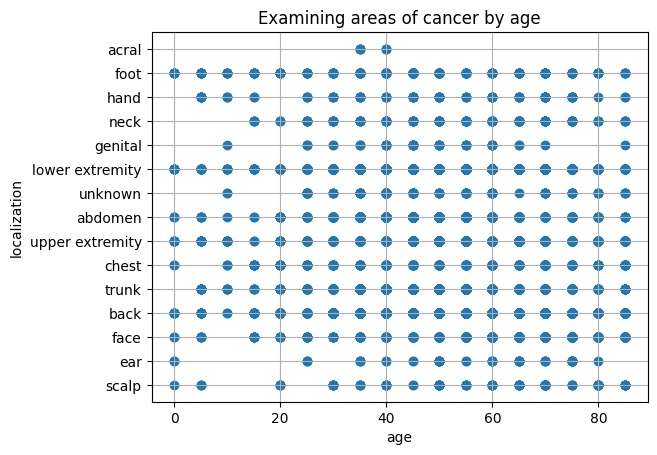

In [18]:
plt.title('Examining areas of cancer by age')
plt.scatter(df1['age'],df1['localization'])
plt.ylabel('localization')
plt.xlabel('age')
plt.grid()
plt.show()

This is totally intresting the most people having acral cancer only in  38 to 40 year old. But still this graph does not explain to much.

In [29]:
df1['sex'].value_counts()

,count
sex,
male,5400
female,4548
unknown,10


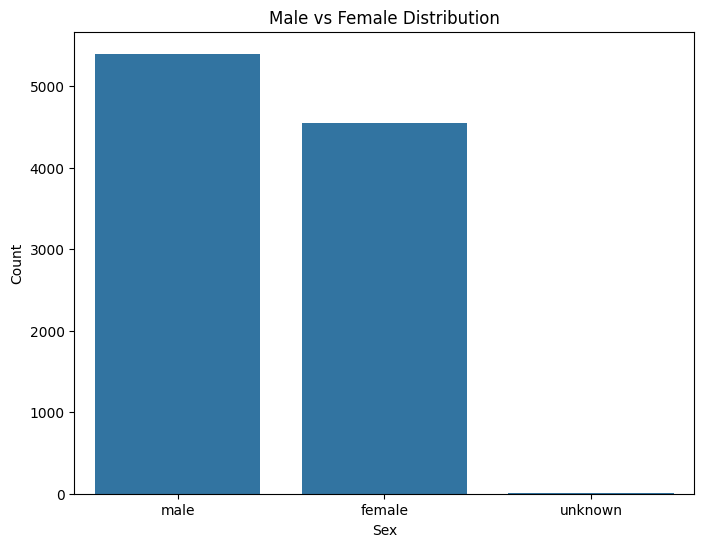

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data = df1)
plt.title("Male vs Female Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

This "unknown" could be the transgender or the data missing value but this value is very less so lets focus in only in male and female.

Text(0.5, 1.0, 'Male vs Female cancer ratio')

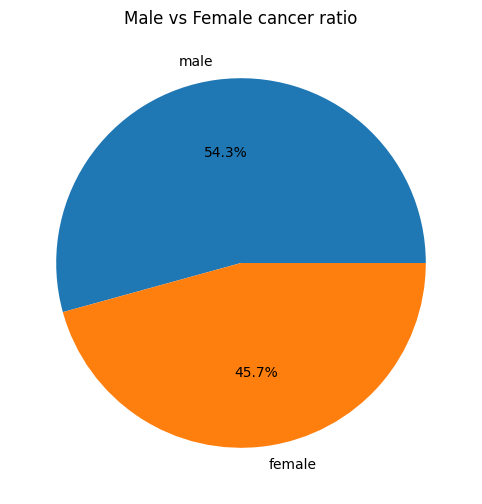

In [41]:
#lets filter out the unknown and represent the data in pie chart
df_filter  =  df1[df1['sex']!="unknown"]
count = df_filter['sex'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(count,labels = count.index, autopct = "%1.1f%%")
plt.title("Male vs Female cancer ratio")

From this graph it is clearly seen that more male have cancer than the female.

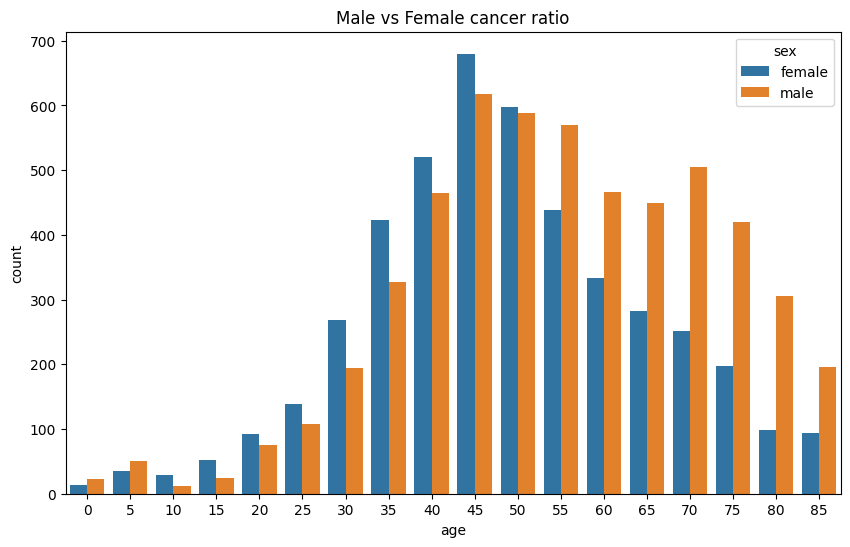

In [43]:
plt.figure(figsize = (10,6))
sns.countplot(x = "age",hue= "sex",data = df_filter)
plt.title("Male vs Female cancer ratio")
plt.show()

Cancer is seen less in the young people and mid people have more number of cancer patient. and female has more cancer in the older age than man

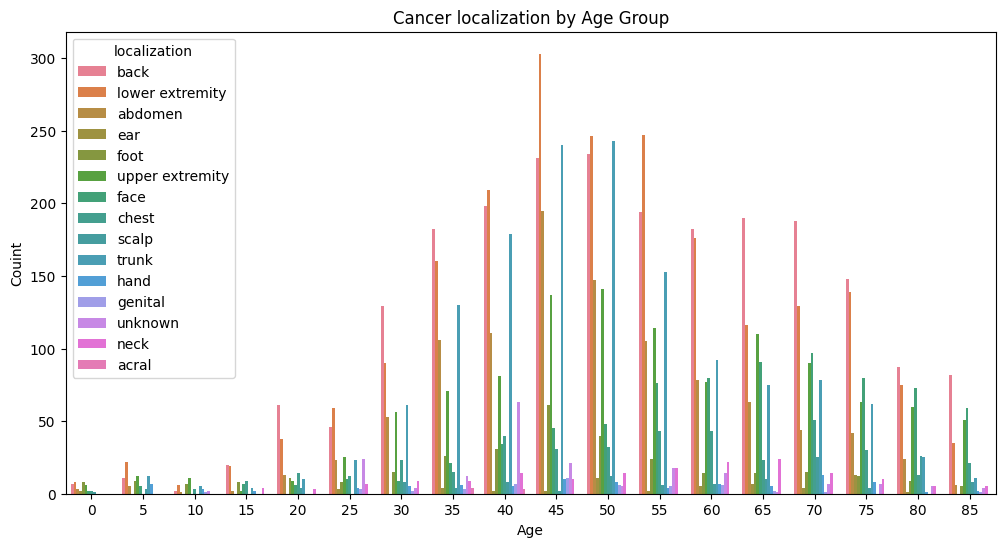

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'age',hue= "localization",data = df1)
plt.title("Cancer localization by Age Group")
plt.xlabel('Age')
plt.ylabel("Couint")
plt.show()

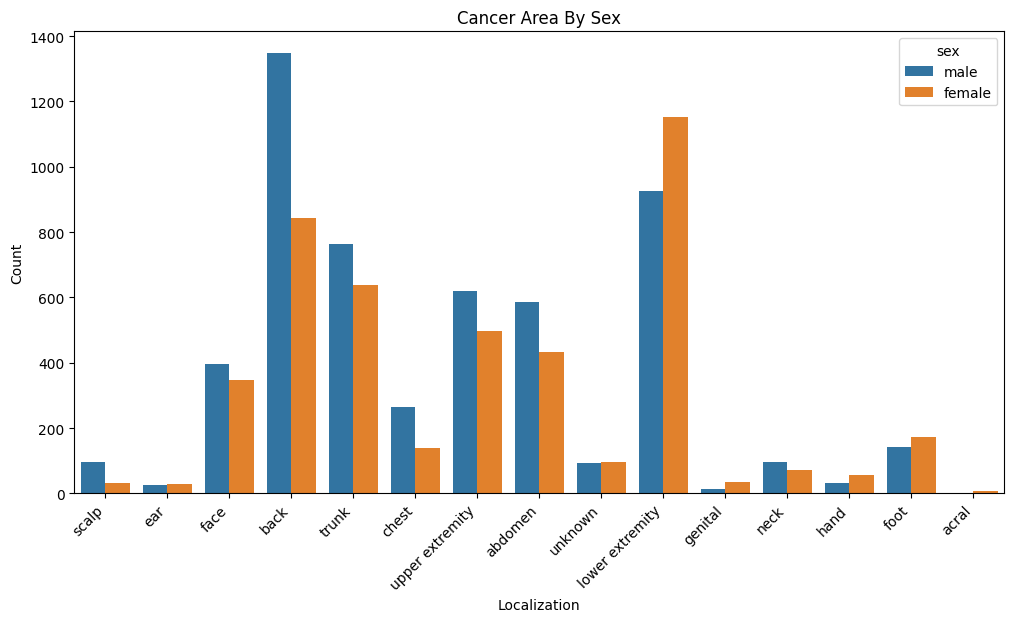

In [51]:
plt.figure(figsize = (12,6))
sns.countplot(x  = 'localization', hue= 'sex', data = df1[df1['sex'] != 'unknown'])

plt.title("Cancer Area By Sex")
plt.xlabel("Localization")
plt.ylabel("Count")
plt.xticks(rotation=45,ha='right')
plt.show()

Most male have cancer at back whereas the female has more cancer at the lower extremity

## ML

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maxashoka","key":"b9a7e6074cdb8aea0f369fde55c833b5"}'}

In [6]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000



Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000



Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0


In [ ]:

!unzip -q skin-cancer-mnist-ham10000.zip -d ham10000_data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load metadata
df = pd.read_csv('ham10000_data/HAM10000_metadata.csv')

# Show the top rows
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


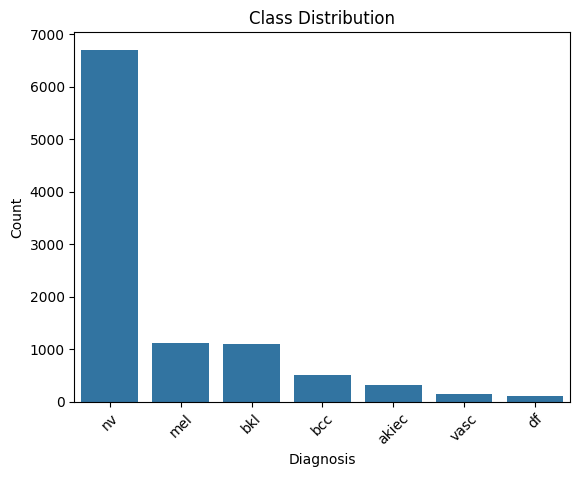

,count
dx,
nv,6705
mel,1113
bkl,1099
bcc,514
akiec,327
vasc,142
df,115


In [ ]:
# Count each skin disease class
sns.countplot(data=df, x='dx', order=df['dx'].value_counts().index)
plt.title("Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Print class distribution
df['dx'].value_counts()


In [ ]:
import shutil
image_dir = "ham10000_data/all_images"

# lets create a new folder
os.makedirs(image_dir,exist_ok=True)



In [ ]:
os.listdir('/content/ham10000_data')

['HAM10000_images_part_1',
 'hmnist_28_28_RGB.csv',
 'ham10000_images_part_2',
 'ham10000_images_part_1',
 'hmnist_8_8_RGB.csv',
 'all_images',
 'HAM10000_images_part_2',
 'hmnist_28_28_L.csv',
 'hmnist_8_8_L.csv',
 'HAM10000_metadata.csv']

In [ ]:
# Merging images from both parts
for part in ['HAM10000_images_part_1','ham10000_images_part_1']:
  part_path = f''